This script collects the data from the initial CSV files provided by Storj and maps it to specific wallet addresses. It then creates/aggregates a number of features by wallet that will be used as a basis for clustering analysis. Its output is a csv file called OperatorDatax.pkl. It is stored as a pickle file to preserve the columns with data type list.  -- Lisa Marshall

In [ ]:
import pandas as pd, numpy as np
import datetime as dt
##Pull in data provided by Storj in csv files
apNodes = pd.read_csv('data/ap_nodes_a.csv')
euNodes = pd.read_csv('data/eu_nodes_a.csv')
usNodes = pd.read_csv('data/us_nodes_a.csv')
paymentsap = pd.read_csv('data/ap_node_payments.csv')
paymentseu = pd.read_csv('data/eu_node_payments.csv')
paymentsus = pd.read_csv('data/us_node_payments.csv')
payReceiptap = pd.read_csv('data/ap_node_payments_receipt.csv')
payReceipteu = pd.read_csv('data/eu_node_payments_receipt.csv')
payReceiptus = pd.read_csv('data/us_node_payments_receipt.csv')

In [ ]:
#Combine the regions into single sets
allNodes = apNodes.append(euNodes).append(usNodes)
paymentsAll = paymentsap.append(paymentseu).append(paymentsus)
payReceiptsAll = payReceiptap.append(payReceipteu).append(payReceiptus)

In [ ]:
allNodes = allNodes.iloc[:,1:].drop_duplicates()

In [ ]:
#Lowercase wallet addresses, node ids, and email hashes, etc
allNodes['wallet'] = allNodes['wallet'].astype(str).str.lower()
allNodes['id'] = allNodes['id'].astype(str).str.lower()
allNodes['email_hash'] = allNodes['email_hash'].astype(str).str.lower()
paymentsAll['node_id'] = paymentsAll['node_id'].astype(str).str.lower()
payReceiptsAll['node_id'] = payReceiptsAll['node_id'].astype(str).str.lower()
payReceiptsAll['receipt'] = payReceiptsAll['receipt'].astype(str).str.lower()

In [ ]:
#Convert payment period to datetime and convert amount (Ben indicated correct amt is amount/1000000)
payReceiptsAll.period = pd.to_datetime(payReceiptsAll.period).dt.date
payReceiptsAll['adjustedAmount'] = payReceiptsAll['amount']/1000000
paymentsAll.period = pd.to_datetime(paymentsAll.period).dt.date
paymentsAll['adjustedAmount'] = paymentsAll['amount']/1000000
allNodes.created_at = pd.to_datetime(allNodes.created_at).dt.date
allNodes.vetted_at = pd.to_datetime(allNodes.vetted_at).dt.date
allNodes.last_contact_success = pd.to_datetime(allNodes.last_contact_success).dt.date
allNodes.last_contact_failure = pd.to_datetime(allNodes.last_contact_failure).dt.date
allNodes.disqualified = pd.to_datetime(allNodes.disqualified).dt.date
allNodes.exit_finished_at = pd.to_datetime(allNodes.exit_finished_at).dt.date
allNodes.suspended = pd.to_datetime(allNodes.suspended).dt.date

In [ ]:
allNodes = allNodes.drop_duplicates()
paymentsAll = paymentsAll.drop_duplicates()
payReceiptsAll = payReceiptsAll.drop_duplicates()

In [ ]:
#Save standardized versions of data to file
'''
allNodes.to_csv('allNodes.csv')
paymentsAll.to_csv('allPayments.csv')
payReceiptsAll.to_csv('allPayReceipts.csv')
'''

**Quickstart: upload combined files**

In [1]:
#quickstart
import pandas as pd, numpy as np
import datetime as dt
allNodes = pd.read_csv('allNodes.csv')
paymentsAll = pd.read_csv('allPayments.csv')
payReceiptsAll = pd.read_csv('allPayReceipts.csv')
tier2tx = pd.read_csv('tokenTx_2tiers.csv')

In [2]:
#upload tier-2 token transaction data (showing which wallets the node operator wallets transact with)
tier2tx = pd.read_csv('tokenTx_walletSummary.csv')

In [3]:
#Create features for each node using the nodes_a data
allNodes['created_at'] = pd.to_datetime(allNodes['created_at']).dt.date
allNodes['auditSuccessRatio'] = allNodes['audit_success_count']/allNodes['total_audit_count']
allNodes['uptimeSuccessRatio'] = allNodes['uptime_success_count']/allNodes['total_uptime_count']
allNodes['auditReputation'] = allNodes['audit_reputation_alpha']/(allNodes['audit_reputation_alpha']+allNodes['audit_reputation_beta'])

In [4]:
#Get rid of nodes that have the impossible last_contact success year of 2070.
#Ben suggests these are nodes that have never been contacted and so are not operational
badNodes = allNodes[allNodes.last_contact_success=='2070-01-01']
allNodes = allNodes[~allNodes.id.isin(list(badNodes.id))]

In [5]:
allNodes = allNodes.reset_index()

In [6]:
len(allNodes.wallet.unique())

16528

In [7]:
#There are nans in the wallet column. I plan to remove them since they show no piece counts on the nodes
#and they're all showing as unaudited, unvetted, and disqualified.
allNodes.wallet.isnull().values.any()
#sum(allNodes.wallet.str.contains('nan'))
len(allNodes[allNodes.wallet.isnull()])
allNodes[allNodes.wallet.isnull()]


,index,Unnamed: 0,id,audit_success_count,total_audit_count,uptime_success_count,total_uptime_count,created_at,vetted_at,wallet,...,disqualified,suspended,piece_count,audit_reputation_alpha,audit_reputation_beta,exit_finished_at,email_hash,auditSuccessRatio,uptimeSuccessRatio,auditReputation
55,55,55,a88fec3f63345609908dc0b80ed5475ddc3f6fb0d48455...,0,0,3661,5884,2019-08-25,NaN,NaN,...,2021-04-06,NaN,0,1.0,0.0,NaN,f34912a1d0fcc21b27e4c2a11adc67d4fa5de69b5f9d4f...,NaN,0.622196,1.0
301,301,301,004ae89e970e703df42ba4ab1416a3b30b7e1d8e14aa0e...,0,0,39216,39460,2019-06-10,NaN,NaN,...,2021-04-06,NaN,0,50.0,0.0,NaN,075528392d9fe17b78163759ceba5a07f5b0fb6250b30d...,NaN,0.993817,1.0
1235,1235,1235,ace4e4644a0af8c49ba45b0b3bc23d91b208d44dbce55f...,0,0,185,7797,2019-07-19,NaN,NaN,...,2021-04-06,NaN,0,1.0,0.0,NaN,f34912a1d0fcc21b27e4c2a11adc67d4fa5de69b5f9d4f...,NaN,0.023727,1.0
3114,3114,3114,af2c42003efc826ab4361f73f9d890942146fe0ebe8067...,0,0,43103,43110,2019-06-10,NaN,NaN,...,2021-04-06,NaN,0,50.0,0.0,NaN,e81d45540261d6c8e60a9efd49affe921af0196f04e1e8...,NaN,0.999838,1.0
7214,7214,7214,1c77791adc39ed11c82332691328ed657cc6a767ab765a...,0,0,2,8375,2019-07-01,NaN,NaN,...,2021-04-06,NaN,0,1.0,0.0,NaN,f34912a1d0fcc21b27e4c2a11adc67d4fa5de69b5f9d4f...,NaN,0.000239,1.0
26122,26122,26122,f8bc81398b8e7a3a8cbf70bd38de6c87da4bfd29fd96bd...,0,0,1,5630,2019-08-05,NaN,NaN,...,2021-04-06,NaN,0,1.0,0.0,NaN,f34912a1d0fcc21b27e4c2a11adc67d4fa5de69b5f9d4f...,NaN,0.000178,1.0
31990,31990,31990,84a74c2cd43c5ba76535e1f42f5df7c287ed68d3352278...,0,0,119819,119831,2019-06-10,NaN,NaN,...,2021-04-06,NaN,0,50.0,0.0,NaN,e81d45540261d6c8e60a9efd49affe921af0196f04e1e8...,NaN,0.999900,1.0
35069,35069,35069,9a7c00def98d1ae0ebe63eeaae8e0e333b6e6fd85e93a5...,0,0,1,8173,2019-07-16,NaN,NaN,...,2021-04-06,NaN,0,1.0,0.0,NaN,f34912a1d0fcc21b27e4c2a11adc67d4fa5de69b5f9d4f...,NaN,0.000122,1.0
36211,36211,36211,a28b4f04e10bae85d67f4c6cb82bf8d4c0f0f47a8ea726...,0,0,46316,46328,2019-06-10,NaN,NaN,...,2021-04-06,NaN,0,50.0,0.0,NaN,e81d45540261d6c8e60a9efd49affe921af0196f04e1e8...,NaN,0.999741,1.0
37109,37109,46,004ae89e970e703df42ba4ab1416a3b30b7e1d8e14aa0e...,0,0,56411,56723,2019-05-31,NaN,NaN,...,2021-04-06,NaN,0,50.0,0.0,NaN,075528392d9fe17b78163759ceba5a07f5b0fb6250b30d...,NaN,0.994500,1.0


In [8]:
#Removing those nan wallets
print(len(allNodes))
allNodes = allNodes[~allNodes.wallet.isnull()]
print(len(allNodes)+26)

103134
103134


In [9]:
len(allNodes.wallet.unique())

16527

In [10]:
#group nodes by wallet, remove nans, and merge the wallet list with the original df
allNodesWalletList = allNodes.groupby('id')['wallet'].unique().apply(list).reset_index(name='walletList')
allNodesWalletList.walletList = allNodesWalletList.walletList.apply(lambda x: [i for i in x if str(i) != "nan"])

In [11]:
#merge with node dataset
allNodes = allNodes.merge(allNodesWalletList[['id','walletList']],left_on='id',right_on='id',how='left')

In [12]:
#create a df to retain id
allNodesEmailList = allNodes.groupby('id')['email_hash'].unique().apply(list).reset_index(name='emailList')
allNodesEmailList.emailList = allNodesEmailList.emailList.apply(lambda x: [i for i in x if str(i) != "nan"])

In [13]:
#merge with node dataset
allNodes = allNodes.merge(allNodesEmailList[['id','emailList']],left_on='id',right_on='id',how='left')

In [14]:
allNodes.drop(allNodes.columns[[0,1]], axis=1, inplace=True)

In [15]:
#Aggregate all of the node features by the wallet they're identified with in the nodes_a file
aggregateByWallet = allNodes.groupby(allNodes['wallet'], as_index=False).aggregate({'email_hash':'nunique','id':'nunique','auditSuccessRatio':'max','uptimeSuccessRatio':'max','piece_count':'max','free_disk':'max','auditReputation':'max','created_at':'max'})
aggregateByWallet1 = aggregateByWallet.rename(columns={'email_hash':'unique_emails','id':'unique_nodes','auditSuccessRatio':'maxAuditSuccessRate','uptimeSuccessRatio':'maxUptimeSuccessRate','piece_count':'maxPieceCount','free_disk':'maxFreeDisk','auditReputation':'maxAuditReputation','created_at':'mostRecentNodeCreated'})

In [16]:
#Check the max number of wallets in any wallet list
allNodesWalletList['listlen']= allNodesWalletList['walletList'].apply(lambda x: len(x))
max(allNodesWalletList['listlen'])

2

In [17]:
#Confirm there are no NaNs in the unique_emails column
aggregateByWallet1.unique_emails.unique()

array([  6,   1,   3,   5,   2,  11,   9,   4,  21,   7,   8,  10,  12,
        20,  49,  17,  15,  29,  32,  19,  16,  13,  34,  30,  46,  24,
        33,  22, 116,  18,  14,  35,  56, 101,  47,  60], dtype=int64)

In [18]:
aggregateByWallet2 = allNodes.groupby(allNodes['wallet'], as_index=False).aggregate({'auditSuccessRatio':'min','uptimeSuccessRatio':'min','piece_count':'min','free_disk':'min','auditReputation':'min','created_at':'min'})
aggregateByWallet2 = aggregateByWallet2.rename(columns={'auditSuccessRatio':'minAuditSuccessRate','uptimeSuccessRatio':'minUptimeSuccessRate','piece_count':'minPieceCount','free_disk':'minFreeDisk','auditReputation':'minAuditReputation','created_at':'earliestNodeCreated'})

In [19]:
aggregateByWallet3 = allNodes.groupby(allNodes['wallet'], as_index=False).aggregate({'auditSuccessRatio':'mean','uptimeSuccessRatio':'mean','piece_count':'mean','free_disk':'mean','auditReputation':'mean'})
aggregateByWallet3 = aggregateByWallet3.rename(columns={'auditSuccessRatio':'avgAuditSuccessRate','uptimeSuccessRatio':'avgUptimeSuccessRate','piece_count':'avgPieceCount','free_disk':'avgFreeDisk','auditReputation':'avgAuditReputation'})

In [20]:
#use df to preserve wallet numbers
aggregateByWallet4 = allNodes.groupby('wallet')['walletList'].apply(list).reset_index(name='fullWalletList')

In [21]:
aggregateByWallet4['numAssocWallets']= aggregateByWallet4['fullWalletList'].apply(lambda x: len(x))
aggregateByWallet4['numAssocWallets'].max()

4156

In [22]:
aggregateByWallet5 = allNodes.groupby('wallet')['emailList'].apply(list).reset_index(name='fullEmailList')
aggregateByWallet5['numAssocEmails']= aggregateByWallet5['fullEmailList'].apply(lambda x: len(x))
aggregateByWallet5['numAssocEmails'].max()

4156

In [23]:
aggregateByWallet4.numAssocWallets.unique()

array([ 164,   60,    3,    1,   81,    9,   26,    4,    6,   14,   12,
         21,    2,   10,   18,    7,   24,    5,   20,   15,   25,   30,
         36,   33,   27,   11,   13,   16,    8,   37,   63,   19,  111,
        121,   48,   56,   54,   57,   43,  147,  109,   23,   45,   53,
         66,   87,   39,   90,   22,   85,   34,   17,   28,   83,   69,
        247,   38,   29,  117,   40,   92,  143,   61,  201,  136,  126,
         42,   62,  123,   91,   32,  148, 4156,  120,  207,   72,  113,
         31,  159,  129,   82,   73,   78,   70,   76,  114,  305,  133,
        125,  218,   84,  588,  106,   44,   52,   95,  703,  199,  102,
        240,   46,  132,  108,   97,  334,   67,  540,  144,   51,   35,
         99,  664,   75,   65,  417,  191,  293,  233,   88,  402,  183,
        252,   71,  609,  141,  258,   79,  249,  145,  216,  154,   41,
        256,   58,  180,   93,  165,   47,  530,   86,   50], dtype=int64)

In [24]:
def flatten(row):
    flat_list = [item for sublist in row for item in sublist]
    return list(set(flat_list))
aggregateByWallet4['fullWalletList'] = aggregateByWallet4['fullWalletList'].apply(flatten)
aggregateByWallet5['fullEmailList'] = aggregateByWallet5['fullEmailList'].apply(flatten)

In [25]:
#After flattening, duplicates are gone
aggregateByWallet4['numAssocWallets']= aggregateByWallet4['fullWalletList'].apply(lambda x: len(x))
aggregateByWallet4.numAssocWallets.unique()

array([1, 2], dtype=int64)

In [26]:
aggregateByWallet5['numAssocEmails']= aggregateByWallet5['fullEmailList'].apply(lambda x: len(x))
aggregateByWallet5.numAssocEmails.unique()

array([  6,   1,   3,   5,   2,  11,   9,   4,  21,   7,   8,  10,  12,
        20,  49,  17,  15,  29,  32,  19,  16,  13,  34,  30,  46,  24,
        33,  22, 116,  18,  14,  35,  56, 101,  47,  60], dtype=int64)

In [27]:
#check that lengths of all sub-dfs match
print(len(aggregateByWallet1), len(aggregateByWallet2), len(aggregateByWallet3), len(aggregateByWallet4),len(aggregateByWallet5))

16527 16527 16527 16527 16527


In [28]:
#Bind together all of the above elements
aggregateByWallet = aggregateByWallet1.merge(aggregateByWallet2, left_on='wallet',right_on='wallet',how='inner')
aggregateByWallet = aggregateByWallet.merge(aggregateByWallet3, left_on='wallet',right_on='wallet',how='inner')


In [29]:
#Crete a few more features
aggregateByWallet = aggregateByWallet.merge(aggregateByWallet4,left_on='wallet',right_on='wallet',how='left')
aggregateByWallet = aggregateByWallet.merge(aggregateByWallet5,left_on='wallet',right_on='wallet',how='left')


In [30]:
#Reorder columns
aggregateByWallet=aggregateByWallet[['wallet','unique_emails', 'unique_nodes','minAuditSuccessRate', 
                                     'avgAuditSuccessRate','maxAuditSuccessRate','minUptimeSuccessRate',
                                     'avgUptimeSuccessRate','maxUptimeSuccessRate', 'minAuditReputation',
                                     'avgAuditReputation','maxAuditReputation','minFreeDisk','avgFreeDisk',
                                     'maxFreeDisk', 'minPieceCount','avgPieceCount', 'maxPieceCount',
                                     'earliestNodeCreated', 'mostRecentNodeCreated',
                                     'fullWalletList', 'fullEmailList', 'numAssocWallets','numAssocEmails']]

In [31]:
aggregateByWallet

,wallet,unique_emails,unique_nodes,minAuditSuccessRate,avgAuditSuccessRate,maxAuditSuccessRate,minUptimeSuccessRate,avgUptimeSuccessRate,maxUptimeSuccessRate,minAuditReputation,...,maxFreeDisk,minPieceCount,avgPieceCount,maxPieceCount,earliestNodeCreated,mostRecentNodeCreated,fullWalletList,fullEmailList,numAssocWallets,numAssocEmails
0,0x0000000000000000000000000000000000000000,6,160,NaN,NaN,NaN,0.000000,0.022354,0.999908,1.0,...,1000000000000,0,0.000000e+00,0,2019-04-02,2020-11-25,[0x0000000000000000000000000000000000000000],[6dc5d443472d54ba236d760f2569603476e76caae2b60...,1,6
1,0x000000000c7c9cbb8485c5e38c6c0da6a1017c1f,1,20,0.000000,0.910382,1.000000,0.000000,0.916142,1.000000,1.0,...,1743281865728,1,3.701003e+05,1843007,2019-07-14,2021-02-03,[0x000000000c7c9cbb8485c5e38c6c0da6a1017c1f],[76ef56b4ee699b7f2dbb99ac6a57bfb3a3ad93708fce9...,1,1
2,0x000000043dc3052d771845a71efc05b67f40abb4,1,1,0.985836,0.986464,0.987382,0.987477,0.989188,0.992289,1.0,...,3511817278432,575816,1.323677e+06,1805972,2019-04-02,2019-06-10,[0x000000043dc3052d771845a71efc05b67f40abb4],[89552b294746d6acdd6b3a2b995a8821345ee4619262a...,1,1
3,0x0000002bfa4dac0fdcf5cd9d47259241ce92459b,1,1,0.348837,0.379166,0.411111,0.981050,0.983899,0.989599,1.0,...,991695738624,1,2.666667e+00,5,2019-12-07,2019-12-07,[0x0000002bfa4dac0fdcf5cd9d47259241ce92459b],[cf9e39cd5d39c4e638c43f577ce298a5104944e01ff1b...,1,1
4,0x0002ec04e1ac053797414d4c7ac1cb233aab6bfa,1,1,0.342105,0.435249,0.508197,NaN,NaN,NaN,1.0,...,339487571968,2165,6.838667e+03,11129,2021-04-01,2021-04-01,[0x0002ec04e1ac053797414d4c7ac1cb233aab6bfa],[4f65161aee05798279e6b384a7d2c8b5718c8ffcabac9...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16522,0xfff37a066ba6c98cbbe9f0d3b8199a5a9ce40be3,1,1,0.494118,0.560888,0.620748,0.999272,0.999300,0.999350,1.0,...,3959353014528,21,1.296667e+02,331,2020-01-30,2020-01-30,[0xfff37a066ba6c98cbbe9f0d3b8199a5a9ce40be3],[2f2c5ee1a4f4a011598affbc8f81a4119d9487ccdeea7...,1,1
16523,0xfff468240658663eab6cd804add22a1b853ad611,1,1,0.175668,0.217906,0.272966,0.849224,0.864713,0.875686,1.0,...,380252416,3548,6.265000e+03,7938,2020-06-03,2020-06-03,[0xfff468240658663eab6cd804add22a1b853ad611],[a12198f2a4ef93b747e2374f61d0b10df1f0ff2dbf07a...,1,1
16524,0xfff968923f1c1cec1fc3f8491da0f1f0a6866a90,1,1,0.481422,0.581274,0.675862,0.221061,0.222776,0.223679,1.0,...,12463393844096,8931,2.007400e+04,40001,2020-12-23,2020-12-23,[0xfff968923f1c1cec1fc3f8491da0f1f0a6866a90],[3d33219aff8c8fb03cf2d851dec52e4990a3a9cab1a80...,1,1
16525,0xfffd525b7eca99cbe6a4a89e352e03182bd57753,1,1,0.262500,0.297377,0.333333,1.000000,1.000000,1.000000,1.0,...,4995713405144,2,6.666667e+00,10,2020-02-29,2020-02-29,[0xfffd525b7eca99cbe6a4a89e352e03182bd57753],[984598ffbd8d7fad7d14e08c095314537878b56d9f55e...,1,1


In [ ]:
len(aggregateByWallet)

SKIP DOWN TO WHERE IT SAYS 'CONTINUE' (the interim code is for collecting data that's already saved to file)

In [ ]:
###Now integrate node operator payments data
#Get rid of the zksync receipts first and handle the eth payments
payReceiptsAlleth = payReceiptsAll.loc[payReceiptsAll['receipt'].str.contains("eth:")]
#Strip out the 'eth:' prefix
payReceiptsAlleth['receiptAlt'] = payReceiptsAlleth['receipt'].str.slice(4, 70)
#Join with the transaction data in order to get wallet details
findWallet = payReceiptsAlleth.merge(fullTX[['hash','to']], left_on='receiptAlt',right_on='hash',how='left')
ethBatch = findWallet[['period','node_id','amount','receipt','adjustedAmount','receiptAlt','to']].rename(columns={'to':'wallet'})

In [ ]:
#Handle the zksync payments
payReceiptsAllzks = payReceiptsAll.loc[payReceiptsAll['receipt'].str.contains("zksync")]

In [ ]:
#Alter the transaction hash by appending '0x' if it's missing
def fixZksync(receipts):
    fixed = []
    for receipt in receipts:
        receipt = receipt[7:]
        if receipt[0:2]=='0x':
            fixed.append(receipt)
        else:
            fixed.append('0x'+receipt)
    return(fixed)
payReceiptsAllzks['receiptAlt'] = fixZksync(payReceiptsAllzks['receipt'])

In [ ]:
#Retrieve the corresponding wallet address via the zksync api
import requests, time

timer = 0
wallets = []
for receipt in payReceiptsAllzks['receiptAlt']:
    timer+=1
    url = 'https://api.zksync.io/api/v0.1/transactions_all/{}'.format(receipt)
    response = requests.get(url)
    #print('json response:',response.json)
    wallets.append(response.json()['to'])
    #print(response.json()['to'])
    print(timer)
    if timer%15==0:
        time.sleep(1)

In [ ]:
#Add wallet addresses to the dataframe
payReceiptsAllzks['wallet'] = wallets

In [ ]:
#Add new column to store the wallet source
ethBatch['type']='eth'
payReceiptsAllzks['type']='zksync'

In [ ]:
#Merge the two subsets and store the data
paymentsWithWallets = ethBatch.append(payReceiptsAllzks)
#paymentsWithWallets.to_csv('paymentsWithWallets.csv')

CONTINUE

In [32]:
#Read in receipts data
paymentsWithWallets = pd.read_csv('paymentsWithWallets.csv')
paymentsWithWallets['wallet']=paymentsWithWallets['wallet'].str.lower()

In [33]:
#Store eth/zksync wallet type column to append to df later
walletType = paymentsWithWallets[['wallet','type']].drop_duplicates(subset=['wallet'])

In [34]:
#Group payments by wallet and period and convert period payments to columns with wallet as the index
payPerPeriod = paymentsWithWallets.groupby(['wallet','period'])['adjustedAmount'].sum()
ppp = payPerPeriod.to_frame().unstack().fillna(0)
ppp.columns = ppp.columns.droplevel(0)

In [35]:
#View the payments per period dataset
ppp

period,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01
wallet,,,,,,,,,,,,,,,
0x000000000c7c9cbb8485c5e38c6c0da6a1017c1f,2.798151,6.464535,3.982984,6.751506,8.384243,9.722742,10.147297,9.468386,12.507369,21.223553,11.363123,0.000000,38.587927,14.546944,15.551911
0x000000043dc3052d771845a71efc05b67f40abb4,4.365132,6.491240,3.147490,3.761308,4.684491,5.458763,19.002349,7.571633,7.277892,7.493168,5.781276,0.000000,17.210920,0.000000,0.000000
0x0000002bfa4dac0fdcf5cd9d47259241ce92459b,0.001121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0x00083c3ae5730507fa39a90220df704c09cf124d,0.010822,0.178923,0.893439,1.088776,1.400958,3.238516,3.355925,1.855014,4.670326,7.394618,5.566552,0.000000,16.144958,0.000000,11.501957
0x000e4b8d275cbe6af5c01a73bab484282317d8bb,0.000000,0.000000,3.220147,6.788803,8.623011,8.747580,12.003167,9.239427,14.398141,15.512569,11.400706,8.489422,12.140466,3.501729,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xffe6dcd231fc75a8ff56232668d3a94d4c919eca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147643
0xfff37a066ba6c98cbbe9f0d3b8199a5a9ce40be3,0.014509,0.037854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0xfff468240658663eab6cd804add22a1b853ad611,0.000000,0.000000,0.000000,0.000000,0.006299,0.032841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
#Add in the wallet type column stored earlier
ppp=ppp.merge(walletType, left_on='wallet',right_on='wallet',how='left')

In [37]:
#Before merging the payments and nodes data sets, make sure wallets are strings
ppp['wallet']= ppp['wallet'].astype(str)
aggregateByWallet['wallet']=aggregateByWallet['wallet'].astype(str)

In [38]:
#merge the two datasets -- using a right join since we're only interested in wallets that have payment history
aggregateByWallet2 = aggregateByWallet.merge(ppp, left_on = 'wallet', right_on='wallet', how='right')

In [39]:
#View the merged set
aggregateByWallet2

,wallet,unique_emails,unique_nodes,minAuditSuccessRate,avgAuditSuccessRate,maxAuditSuccessRate,minUptimeSuccessRate,avgUptimeSuccessRate,maxUptimeSuccessRate,minAuditReputation,...,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,type
0,0x000000000c7c9cbb8485c5e38c6c0da6a1017c1f,1.0,20.0,0.000000,0.910382,1.000000,0.000000,0.916142,1.000000,1.0,...,10.147297,9.468386,12.507369,21.223553,11.363123,0.000000,38.587927,14.546944,15.551911,eth
1,0x000000043dc3052d771845a71efc05b67f40abb4,1.0,1.0,0.985836,0.986464,0.987382,0.987477,0.989188,0.992289,1.0,...,19.002349,7.571633,7.277892,7.493168,5.781276,0.000000,17.210920,0.000000,0.000000,eth
2,0x0000002bfa4dac0fdcf5cd9d47259241ce92459b,1.0,1.0,0.348837,0.379166,0.411111,0.981050,0.983899,0.989599,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,eth
3,0x00083c3ae5730507fa39a90220df704c09cf124d,1.0,1.0,0.994272,0.994669,0.995182,0.998075,0.998191,0.998381,1.0,...,3.355925,1.855014,4.670326,7.394618,5.566552,0.000000,16.144958,0.000000,11.501957,eth
4,0x000e4b8d275cbe6af5c01a73bab484282317d8bb,1.0,27.0,0.997512,0.999900,1.000000,0.992800,0.996667,0.997881,1.0,...,12.003167,9.239427,14.398141,15.512569,11.400706,8.489422,12.140466,3.501729,0.000000,eth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,0xffe6dcd231fc75a8ff56232668d3a94d4c919eca,1.0,1.0,0.344109,0.390495,0.431849,1.000000,1.000000,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147643,zksync
9092,0xfff37a066ba6c98cbbe9f0d3b8199a5a9ce40be3,1.0,1.0,0.494118,0.560888,0.620748,0.999272,0.999300,0.999350,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,eth
9093,0xfff468240658663eab6cd804add22a1b853ad611,1.0,1.0,0.175668,0.217906,0.272966,0.849224,0.864713,0.875686,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,eth
9094,0xfffd525b7eca99cbe6a4a89e352e03182bd57753,1.0,1.0,0.262500,0.297377,0.333333,1.000000,1.000000,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,eth


In [43]:
len(aggregateByWallet2)

9096

In [40]:
#View the full feature list
aggregateByWallet2.columns[33:39]

Index(['2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
       '2021-04-01'],
      dtype='object')

In [41]:
#Sum up last 6 months of payments into a new column
aggregateByWallet2['sixMonthPay']=aggregateByWallet2.iloc[:,33:39].sum(axis=1)

#Get rid of any rows with no pay for the 6 months
aggregateByWallet2 = aggregateByWallet2[aggregateByWallet2.sixMonthPay>0]

In [42]:
aggregateByWallet2['avgMonthPay'] = aggregateByWallet2.iloc[:,33:39].replace(0, np.NaN).mean(axis=1)
aggregateByWallet2.iloc[0,33:]

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2020-11-01     21.2236
2020-12-01     11.3631
2021-01-01           0
2021-02-01     38.5879
2021-03-01     14.5469
2021-04-01     15.5519
type               eth
sixMonthPay    101.273
avgMonthPay    20.2547
Name: 0, dtype: object

In [45]:
#Download
aggregateByWallet2.to_pickle('OperatorDatax.pkl')

In [81]:
print(len(aggregateByWallet2),len(tier2tx))

5710 32301


Text(0.5, 1.0, 'Month-to-month overview of payments to operators')

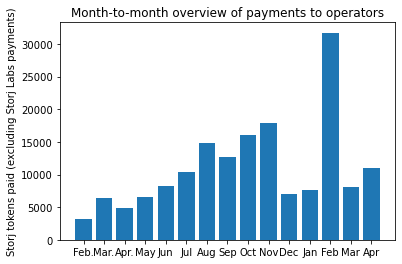

In [72]:
Y = [aggregateByWallet2['2020-02-01'].sum(),aggregateByWallet2['2020-03-01'].sum(),
     aggregateByWallet2['2020-04-01'].sum(),aggregateByWallet2['2020-05-01'].sum(),
     aggregateByWallet2['2020-06-01'].sum(),aggregateByWallet2['2020-07-01'].sum(),
     aggregateByWallet2['2020-08-01'].sum(),aggregateByWallet2['2020-09-01'].sum(),
     aggregateByWallet2['2020-10-01'].sum(),aggregateByWallet2['2020-11-01'].sum(), 
     aggregateByWallet2['2020-12-01'].sum(),
     aggregateByWallet2['2021-01-01'].sum(),
     aggregateByWallet2['2021-02-01'].sum(), aggregateByWallet2['2021-03-01'].sum(),
     aggregateByWallet2['2021-04-01'].sum()]
X = ['Feb.','Mar.','Apr.','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
import matplotlib.pyplot as plt
plt.bar(X,Y)
plt.ylabel('Storj tokens paid (excluding Storj Labs payments)')
plt.title('Month-to-month overview of payments to operators')

In [68]:
print(aggregateByWallet2.columns)
print(tier2tx.columns)

Index(['wallet', 'unique_emails', 'unique_nodes', 'minAuditSuccessRate',
       'avgAuditSuccessRate', 'maxAuditSuccessRate', 'minUptimeSuccessRate',
       'avgUptimeSuccessRate', 'maxUptimeSuccessRate', 'minAuditReputation',
       'avgAuditReputation', 'maxAuditReputation', 'minFreeDisk',
       'avgFreeDisk', 'maxFreeDisk', 'minPieceCount', 'avgPieceCount',
       'maxPieceCount', 'earliestNodeCreated', 'mostRecentNodeCreated',
       'fullWalletList', 'fullEmailList', 'numAssocWallets', 'numAssocEmails',
       '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
       '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
       '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       'type', 'sixMonthPay', 'avgMonthPay'],
      dtype='object')
Index(['wallet', 'num_of_wallets_transacted_out', 'total_num_of_txns_out',
       'num_of_wallets_transacted_in', 'total_num_of_txns_in'],
      dtype='object')


In [42]:
tier2tx.wallet = tier2tx.wallet.str.lower()

In [43]:
walletsTx = aggregateByWallet2.merge(tier2tx, left_on='wallet',right_on='wallet',how='left')
walletsTx

,wallet,unique_emails,unique_nodes,minAuditSuccessRate,avgAuditSuccessRate,maxAuditSuccessRate,minUptimeSuccessRate,avgUptimeSuccessRate,maxUptimeSuccessRate,minAuditReputation,...,2021-02-01,2021-03-01,2021-04-01,type,sixMonthPay,avgMonthPay,num_of_wallets_transacted_out,total_num_of_txns_out,num_of_wallets_transacted_in,total_num_of_txns_in
0,0x000000000c7c9cbb8485c5e38c6c0da6a1017c1f,1.0,20.0,0.000000,0.910382,1.000000,0.000000,0.916142,1.000000,1.000000,...,38.587927,14.546944,15.551911,eth,101.273458,20.254692,2.0,11.0,12.0,77.0
1,0x000000043dc3052d771845a71efc05b67f40abb4,1.0,1.0,0.985836,0.986464,0.987382,0.987477,0.989188,0.992289,1.000000,...,17.210920,0.000000,0.000000,eth,30.485364,10.161788,2.0,5.0,26.0,77.0
2,0x00083c3ae5730507fa39a90220df704c09cf124d,1.0,1.0,0.994272,0.994669,0.995182,0.998075,0.998191,0.998381,1.000000,...,16.144958,0.000000,11.501957,eth,40.608085,10.152021,0.0,0.0,8.0,33.0
3,0x000e4b8d275cbe6af5c01a73bab484282317d8bb,1.0,27.0,0.997512,0.999900,1.000000,0.992800,0.996667,0.997881,1.000000,...,12.140466,3.501729,0.000000,eth,51.044892,10.208978,1.0,93.0,10.0,272.0
4,0x00101a0e98ecea02681a5447c3cab0c787d109f6,3.0,3.0,0.215339,0.727280,0.998169,0.840715,0.975723,0.999557,0.598737,...,0.000000,0.000000,0.000000,eth,1.091716,1.091716,3.0,5.0,14.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,0xffbfc143924950bbd4ac6b6b4879001b6252dc40,2.0,2.0,0.488470,0.763161,0.957862,0.909605,0.974453,0.995092,0.950000,...,4.157702,0.000000,4.306590,eth,21.567259,5.391815,0.0,0.0,11.0,42.0
5706,0xffcfa143fbbc303790b6e5458cc3e3b570cf5343,1.0,1.0,0.992087,0.992991,0.993692,0.999224,0.999245,0.999262,1.000000,...,6.192285,0.000000,0.000000,eth,7.008892,3.504446,0.0,0.0,5.0,13.0
5707,0xffe336267854a7133a99a26910564439e5d57610,1.0,1.0,0.878029,0.899908,0.919581,0.971905,0.973105,0.975309,1.000000,...,0.000000,0.000000,6.549297,eth,10.539749,5.269874,2.0,8.0,16.0,54.0
5708,0xffe6dcd231fc75a8ff56232668d3a94d4c919eca,1.0,1.0,0.344109,0.390495,0.431849,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.147643,zksync,0.147643,0.147643,NaN,NaN,NaN,NaN


In [44]:
#drop numAssocEmails, since it's a duplicate of unique_emails
walletsTx = walletsTx.drop('numAssocEmails',axis=1)

In [45]:
walletsTx[(walletsTx.total_num_of_txns_in.isna()) & (walletsTx.type != 'zksync')]

,wallet,unique_emails,unique_nodes,minAuditSuccessRate,avgAuditSuccessRate,maxAuditSuccessRate,minUptimeSuccessRate,avgUptimeSuccessRate,maxUptimeSuccessRate,minAuditReputation,...,2021-02-01,2021-03-01,2021-04-01,type,sixMonthPay,avgMonthPay,num_of_wallets_transacted_out,total_num_of_txns_out,num_of_wallets_transacted_in,total_num_of_txns_in


In [46]:
missingWallets = walletsTx[(walletsTx.total_num_of_txns_in.isna())]
missingWallets.to_csv('missingWallets.csv')

In [48]:
missingWallets

,wallet,unique_emails,unique_nodes,minAuditSuccessRate,avgAuditSuccessRate,maxAuditSuccessRate,minUptimeSuccessRate,avgUptimeSuccessRate,maxUptimeSuccessRate,minAuditReputation,...,2021-02-01,2021-03-01,2021-04-01,type,sixMonthPay,avgMonthPay,num_of_wallets_transacted_out,total_num_of_txns_out,num_of_wallets_transacted_in,total_num_of_txns_in
18,0x007de57773b6eb4ebbf6a740dfde1efdd5629630,1.0,2.0,0.999069,0.999725,1.000000,0.995475,0.998502,1.000000,1.0,...,0.000000,0.284612,0.922836,zksync,1.207448,0.603724,NaN,NaN,NaN,NaN
29,0x00bd70ef792a8c376fe5954f11a767f89cdf3e3d,1.0,3.0,0.999891,0.999969,1.000000,0.999602,0.999878,0.999975,1.0,...,0.000000,6.514140,18.642509,zksync,25.156649,12.578325,NaN,NaN,NaN,NaN
31,0x00d37345c65c7d7562b7030772f7b6cc6593cde2,1.0,1.0,0.988372,0.995769,1.000000,NaN,NaN,NaN,1.0,...,0.000000,0.022921,0.062002,zksync,0.084923,0.042461,NaN,NaN,NaN,NaN
49,0x019abd316838b1fb8dd49d66c13b01b5ea3cdbaf,1.0,1.0,0.944444,0.954470,0.973510,NaN,NaN,NaN,1.0,...,0.000000,0.001508,0.005248,zksync,0.006756,0.003378,NaN,NaN,NaN,NaN
50,0x01a8fa46d6ee32c902534779785d4723345c310c,1.0,1.0,0.936949,0.937454,0.937771,0.986975,0.987130,0.987252,1.0,...,0.000000,0.538393,0.608440,zksync,1.146833,0.573416,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,0xfe569ec09ca650fc36cecab34e45f50b316d7631,1.0,1.0,0.997731,0.998403,0.999066,0.981152,0.981483,0.981891,1.0,...,0.000000,0.348750,0.487689,zksync,0.836439,0.418219,NaN,NaN,NaN,NaN
5674,0xfe79e9b3a5b664adf35906c233e3694dadc2ecfe,1.0,1.0,0.958558,0.959582,0.960862,0.842558,0.851731,0.861715,1.0,...,0.000000,0.000000,3.244194,zksync,3.244194,3.244194,NaN,NaN,NaN,NaN
5684,0xfeee183f11f27c85dfdfe16b00b7b2a4d9aa9b5a,1.0,1.0,0.925872,0.933910,0.939113,0.560720,0.562024,0.563654,1.0,...,0.406885,0.095285,0.078481,zksync,0.580651,0.193550,NaN,NaN,NaN,NaN
5687,0xff17049777be3acb433f8314157eea01c2925b6b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,4.528677,zksync,4.528677,4.528677,NaN,NaN,NaN,NaN


In [53]:
missingWallets[missingWallets.wallet=='0x00bd70ef792a8c376fe5954f11a767f89cdf3e3d'].fullWalletList

29    [0x00bd70ef792a8c376fe5954f11a767f89cdf3e3d]
Name: fullWalletList, dtype: object

In [56]:
checkNodes = list(allNodes[allNodes.wallet=='0x00bd70ef792a8c376fe5954f11a767f89cdf3e3d'].id)

In [61]:
payReceiptsAll[(payReceiptsAll.period=='2021-04-01') & (payReceiptsAll.node_id.isin(checkNodes))]

,Unnamed: 0,period,node_id,amount,receipt,adjustedAmount
105506,105506,2021-04-01,003812e1ab99fe815e94912cccc471ef72efbf860ca463...,535505,zksync:9669464ce74b135a55c8e65c4a904d70a454958...,0.535505
106249,106249,2021-04-01,1c656fcd65f7309c272d4af81acfc6fe8c24d9116b9388...,704466,zksync:9669464ce74b135a55c8e65c4a904d70a454958...,0.704466
108368,108368,2021-04-01,693088ba027c1f38710fc2602250abcbd34cc662204df1...,2461019,zksync:9669464ce74b135a55c8e65c4a904d70a454958...,2.461019
218783,106381,2021-04-01,003812e1ab99fe815e94912cccc471ef72efbf860ca463...,4189384,zksync:9669464ce74b135a55c8e65c4a904d70a454958...,4.189384
219528,107129,2021-04-01,1c656fcd65f7309c272d4af81acfc6fe8c24d9116b9388...,911678,zksync:9669464ce74b135a55c8e65c4a904d70a454958...,0.911678
221681,109293,2021-04-01,693088ba027c1f38710fc2602250abcbd34cc662204df1...,4140698,zksync:9669464ce74b135a55c8e65c4a904d70a454958...,4.140698
332123,106452,2021-04-01,003812e1ab99fe815e94912cccc471ef72efbf860ca463...,3104911,zksync:9669464ce74b135a55c8e65c4a904d70a454958...,3.104911
332910,107240,2021-04-01,1c656fcd65f7309c272d4af81acfc6fe8c24d9116b9388...,373756,zksync:9669464ce74b135a55c8e65c4a904d70a454958...,0.373756
335168,109502,2021-04-01,693088ba027c1f38710fc2602250abcbd34cc662204df1...,2221092,zksync:9669464ce74b135a55c8e65c4a904d70a454958...,2.221092


In [ ]:
#List of known/suspected Storj wallets
storjCompanyWallets = ['0x303edcd8dbe1607fe512d45cc15d3e41fa4db44b','0x2d5fc0cdef7b5c020087b228c76fb3fddae8cbf2','0xcf2d4537c7959fd0c381b05d6b98746d507e87dc',
                       '0x66f0b890c2bf6d71756f03fd3b2aad18b39775ec','0x42c23e580df26fbf338c99f11562f23e5abaf788','0x0565aeb7c842c971bc5ee9d85efe738d57702a35']

In [ ]:
#More storj wallets?
walletsUsedForZksyncPayments = ['0xd3228ca2f1a85896346f83f5260f37f3e1538230']